# Problem Statement

**PROJECTO 1** <br>
**Análisis exploratorio y modelado predictivo de precios de viviendas en Barcelona usando Python y SQL**

## Objective
Desarrollar un análisis completo y un modelo predictivo para los precios de viviendas en Barcelona, utilizando datos extraídos del portal Fotocasa. El objetivo es aplicar técnicas de extracción, manipulación y análisis de datos, así como algoritmos de Machine Learning, para predecir los precios de las viviendas en función de diversas características.

## Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter

## Importing necessary libraries

In [126]:
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
sns.set_style('whitegrid') # set style for visualization

# To supress warnings
import warnings # ignore warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [152]:
df=pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')

# Data Overview

In [153]:
df.head() # preview a sample first 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [154]:
df.tail() # preview a sample last 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
8183,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462
8184,8184,1500,3,2,True,False,110,flat,Eixample,13.636364
8185,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667
8186,8186,1500,3,2,True,False,110,flat,Eixample,13.636364
8187,8187,1500,3,2,True,False,110,flat,Eixample,13.636364


In [155]:
df.sample(20) # preview a sample random n rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
6133,6133,900,3,1,True,True,95,flat,Sant Martí,9.473684
3782,3782,700,3,1,False,False,55,flat,Horta- Guinardo,12.727273
6523,6523,900,4,2,True,False,82,flat,Sarria-Sant Gervasi,10.975610
6733,6733,2200,2,2,True,False,123,flat,Les Corts,17.886179
3555,3555,850,3,1,False,False,49,flat,Gràcia,17.346939
3256,3256,795,2,1,False,False,58,flat,Gràcia,13.706897
3133,3133,850,3,1,True,False,75,flat,Sant Andreu,11.333333
7635,7635,740,2,2,False,False,50,flat,Horta- Guinardo,14.800000
5699,5699,750,2,1,False,False,51,flat,Gràcia,14.705882
5578,5578,800,2,2,True,False,68,flat,Sarria-Sant Gervasi,11.764706


In [156]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") # number of observations and features


There are 8188 rows and 10 columns.


In [157]:
df.dtypes # data types

Unnamed: 0               int64
price                    int64
rooms                    int64
bathroom                 int64
lift                      bool
terrace                   bool
square_meters            int64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [159]:
df.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,8188.0,NaN,NaN,NaN,4093.5,2363.816335,0.0,2046.75,4093.5,6140.25,8187.0
price,8188.0,NaN,NaN,NaN,1444.092574,1125.886215,320.0,875.0,1100.0,1540.0,15000.0
rooms,8188.0,NaN,NaN,NaN,2.420738,1.138592,0.0,2.0,2.0,3.0,10.0
bathroom,8188.0,NaN,NaN,NaN,1.508793,0.732798,1.0,1.0,1.0,2.0,8.0
lift,8188,2,True,5710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,8188,2,False,6518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,8188.0,NaN,NaN,NaN,84.610161,47.874028,10.0,56.0,73.0,95.0,679.0
real_state,7920,4,flat,6505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,8188,10,Eixample,2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,8188.0,NaN,NaN,NaN,17.739121,9.245241,4.910714,12.790698,15.306122,19.444444,186.666667


In [160]:
# Uniques
df.nunique() # Checking for number of variations in the data
for i in df.columns: # Checking uniques
    print (i,": ",df[i].unique())

Unnamed: 0 :  [   0    1    2 ... 8185 8186 8187]
price :  [  750   770  1300  2800   720  1100  1350   900  1165  1050  2500  1335
  2200   980  1500  1080   950   850  1800  2300   842  1180  1200  1400
   852  1250  1000  1600  1450  1246  1580  1950  1060  2700   625  2550
   925  1290  3000   780  1053   650  1190   660  1585  1850   710  3468
  1700   590  3300   700  2900   825  2000  2850  2057  3144  1550  2400
   976  2021  1540  4000   890  1970  1210  1185  2250  1900  3500   795
   895   995  1170   730  1750  1220   800  1195   930   990  1150  1475
  5250   702  1175  1360   690  1690  1130  5720  2290  3600  1480  1835
  2050  3200  3768  2229  2150  1806  2155  2317  2008  2040  2760  1425
  1495  3400  3800  1125   970  8482  3219  1626  1724  5000   935  1590
  5200  2600  1650  6800  6000   975  4900  8000  1975  8500  1949  1385
   550  3833  4600  3850  9075  7000  5300  4700   620   920  1085  1675
  2580   520   840   760 10000  2520  3900  2975  6500  4200  245

In [161]:
# Uniques
cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64
--------------------------------------------------
neighborhood
Eixample               2401
Sarria-Sant Gervasi    1396
Ciutat Vella           1365
Gràcia                  688
Sant Martí              617
Sants-Montjuïc          590
Les Corts               524
Horta- Guinardo         315
Sant Andreu             178
Nou Barris              114
Name: count, dtype: int64
--------------------------------------------------


In [162]:
# Duplicates
df.duplicated().sum() # Checking for duplicate entries in the data

np.int64(0)

# Consolidated notes on Data Overview

- There are 8188 rows and 10 columns.
- The variable 'Unnamed' represent index and should be deleted from data
- Data types are aligned with information
- There is missing data (NaN) on variable 'real_state'. To be replaced by "other"
- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"
- Units size goes from 10m2 to 679m2, with a mean of 84.61m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1444EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.9EUR/m2/month to 186EUR/m2/month, with mean of 17.7EUR/m2/month
- There are units listed with cero rooms (to be investigated)
- Target variable for modeling is "price"

# Exploratory Data Analysis (EDA)

## EDA Functions

In [163]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [164]:
def univariate_categorical(data):
    '''
    Function to generate countplot for each categorical variable
    Labeled with count and percentage
    '''
    # List of categorical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Number of columns in the grid
    num_cols = 4
    
    # Calculate the number of rows needed
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    # Create the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each countplot in the grid
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f'Count of {col}')
           
        # Add total count and percentage annotations
        total = len(data)
        for p in plot.patches:
            height = p.get_height()
            percentage = f'{(height / total * 100):.1f}%'
            plot.text(x=p.get_x() + p.get_width() / 2,
                      y=height + 2,
                      s=f'{height:.0f}\n({percentage})',
                      ha='center')
        
        # Limit x-axis labels to avoid overlap
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Show the plot
    plt.show()


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                8188 non-null   int64   
 1   rooms                8188 non-null   int64   
 2   bathroom             8188 non-null   int64   
 3   lift                 8188 non-null   bool    
 4   terrace              8188 non-null   bool    
 5   square_meters        8188 non-null   int64   
 6   real_state           8188 non-null   category
 7   neighborhood         8188 non-null   category
 8   square_meters_price  8188 non-null   float64 
dtypes: bool(2), category(2), float64(1), int64(4)
memory usage: 352.5 KB


In [266]:
# Function to plot crosstab with labels
def plot_crosstab_bar_count(df, var_interest):
    '''
    Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables
    Labeled with counts
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[var_interest])
        
        # Plot the crosstab as a bar plot
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        
        # Annotate counts in the middle of each bar section
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                axes[i].annotate(f'{int(height)}', 
                                 (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                 ha='center', va='center', fontsize=10, color='black')
        
        # Add total labels at the top of each bar
        totals = crosstab.sum(axis=1)
        for j, total in enumerate(totals):
            axes[i].annotate(f'Total: {total}', 
                             (j, totals[j]), 
                             ha='center', va='bottom', weight='bold')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_bar_count(df, var_interest='var_interest')

In [249]:
def plot_crosstab_heat_perc(df, var_interest):
    '''
    Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables
    Labeled with counts, percentage by row, percentage by column
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, num_rows * 6))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create crosstabs
        crosstab = pd.crosstab(df[col], df[var_interest])
        crosstab_perc_row = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        crosstab_perc_col = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

        # Combine counts with percentages
        crosstab_combined = crosstab.astype(str) + "\n" + \
                            crosstab_perc_row.round(2).astype(str) + "%" + "\n" + \
                            crosstab_perc_col.round(2).astype(str) + "%"

        # Plot the crosstab as a heatmap
        sns.heatmap(crosstab, annot=crosstab_combined, fmt='', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 8})
        axes[i].set_title(f'Crosstab of {col} and {var_interest}', fontsize=12)
        
    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent label overlapping
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Add more space between subplots
    plt.tight_layout()
    plt.show()
    
# Usage
#plot_crosstab_heat_perc(df, var_interest='var_interest')

In [240]:
def boxplot_by_group(df, group, var, outliers):
    '''
    boxplot for a numerical variable of interest vs a categorical variable
    with or without outliers
    includes data mean and mean by category
    '''
    # Calculate the average for the variable
    var_avg = df[var].mean()
    
    # Calculate variable mean per 'GICS Sector'
    var_means = df.groupby(group)[var].mean()
    
    # Sort by means and get the sorted order
    var_sorted = var_means.sort_values(ascending=False).index
    
    # Reorder the DataFrame by the sorted 'GICS Sector'
    df[group] = pd.Categorical(df[group], categories=var_sorted, ordered=True)
    
    # Create the boxplot with the reordered sectors
    ax = sns.boxplot(data=df, x=group, y=var, order=var_sorted, showfliers=outliers)
    
    # Add horizontal line for average variable value
    plt.axhline(var_avg, color='red', linestyle='--', label=f'Avg {var}: {var_avg:.2f}')
    
    # Scatter plot for means
    x_positions = range(len(var_means.sort_values(ascending=False)))
    plt.scatter(x=x_positions, y=var_means.sort_values(ascending=False), color='red', label='Mean', zorder=5)
    
    # Add labels to each red dot with the mean value
    for i, mean in enumerate(var_means.sort_values(ascending=False)):
        plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom')
    
    # Rotate x-axis labels
    plt.xticks(ticks=x_positions, labels=var_means.sort_values(ascending=False).index, rotation=90)
    
    # Add a legend
    plt.legend()
    plt.xlabel('')  # Remove x-axis title
    
    # Adjust layout
    plt.tight_layout()
    
    # Display the plot
    plt.show()

**Functions:**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category

## Data Preprocesing

- Missing value treatment
- Feature engineering
- Outlier detection and treatment
- Any other preprocessing steps

In [167]:
data=df.copy() # Data preprocesing over a copy of original dataset

In [168]:
data.columns #Check column names

Index(['Unnamed: 0', 'price', 'rooms', 'bathroom', 'lift', 'terrace',
       'square_meters', 'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

In [169]:
data.isna().sum() # missing values per feature

Unnamed: 0               0
price                    0
rooms                    0
bathroom                 0
lift                     0
terrace                  0
square_meters            0
real_state             268
neighborhood             0
square_meters_price      0
dtype: int64

In [170]:
data['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64

In [171]:
data['real_state']=data['real_state'].replace(np.nan, 'other')

In [172]:
data.isna().sum() # missing values per feature

Unnamed: 0             0
price                  0
rooms                  0
bathroom               0
lift                   0
terrace                0
square_meters          0
real_state             0
neighborhood           0
square_meters_price    0
dtype: int64

In [173]:
data['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
other         268
study         109
Name: count, dtype: int64

In [174]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [175]:
data.head()

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [176]:
data.loc[data['rooms']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
price,204.0,956.093137,993.654149,423.000000,600.000000,722.500000,850.0,10750.000000
rooms,204.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
bathroom,204.0,1.122549,0.465226,1.000000,1.000000,1.000000,1.0,4.000000
square_meters,204.0,56.009804,62.074958,15.000000,30.000000,40.000000,58.0,679.000000
square_meters_price,204.0,18.751196,5.291655,8.910256,14.666667,18.169643,22.0,37.333333


In [177]:
data.loc[(data['rooms']==0)]['real_state'].value_counts()

real_state
flat         69
other        52
study        51
apartment    22
attic        10
Name: count, dtype: int64

In [178]:
# Check Outliers
for column in data.select_dtypes(include=np.number).columns:
    outliers=len(data[(df[column] < data[column].quantile(0.25)-1.5*(data[column].quantile(0.75)-data[column].quantile(0.25))) | (data[column] > data[column].quantile(0.75)+1.5*(data[column].quantile(0.75)-data[column].quantile(0.25)))][column])
    percentage = (outliers / data.shape[0]) * 100
    print(f'{column}: {outliers} outliers ({percentage:.2f}%)')

price: 807 outliers (9.86%)
rooms: 474 outliers (5.79%)
bathroom: 174 outliers (2.13%)
square_meters: 598 outliers (7.30%)
square_meters_price: 589 outliers (7.19%)


## Univariate Analysis

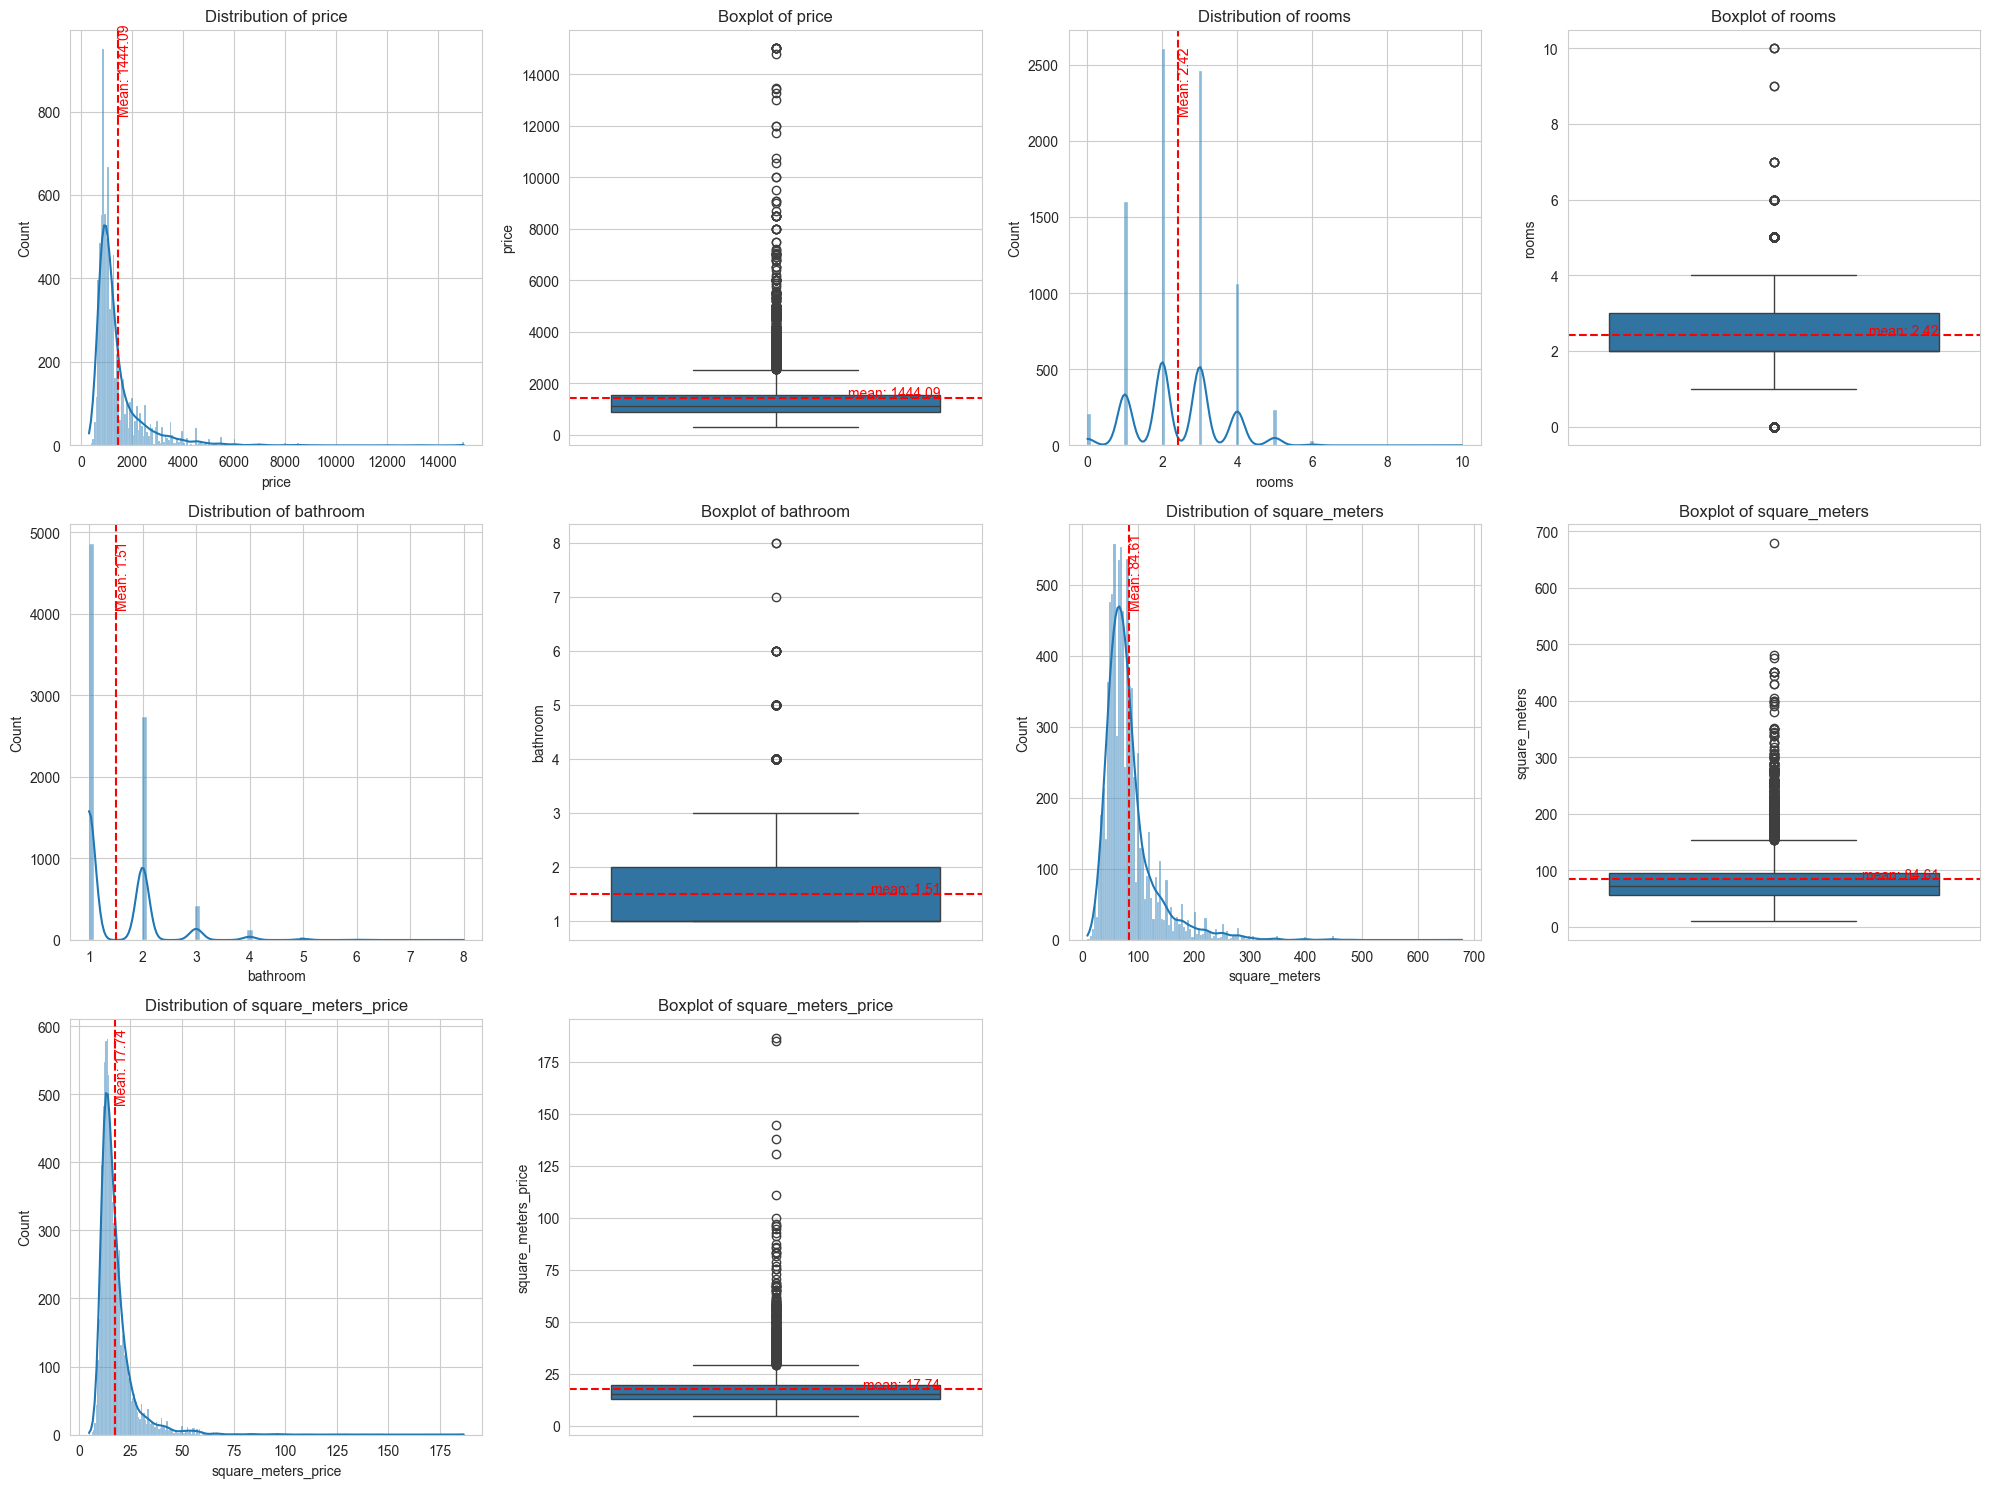

In [179]:
univariate_numerical(data)

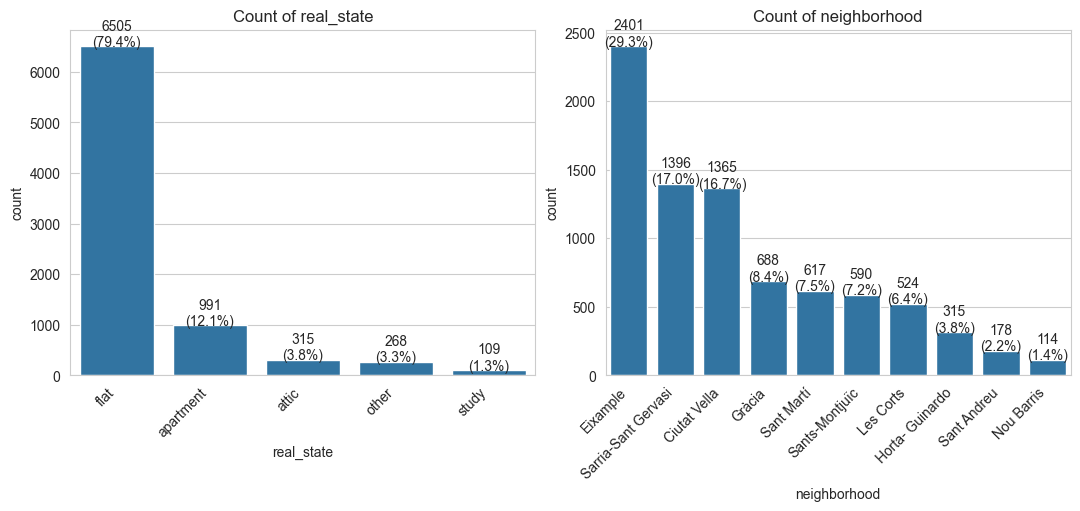

In [180]:
univariate_categorical(data);

In [181]:
data.loc[(data['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
price,6505.0,1316.758032,913.617019,320.000000,865.0,1050.0,1380.000000,15000.0
rooms,6505.0,2.541430,1.091669,0.000000,2.0,3.0,3.000000,10.0
bathroom,6505.0,1.510530,0.720411,1.000000,1.0,1.0,2.000000,8.0
square_meters,6505.0,85.514527,45.535769,11.000000,60.0,75.0,95.000000,679.0
square_meters_price,6505.0,15.755932,5.405202,5.555556,12.5,14.5,17.692308,100.0


## Bivariate Analysis

In [182]:
# Calculate correlation matrix
corr_matrix = data.select_dtypes(include=np.number).corr()

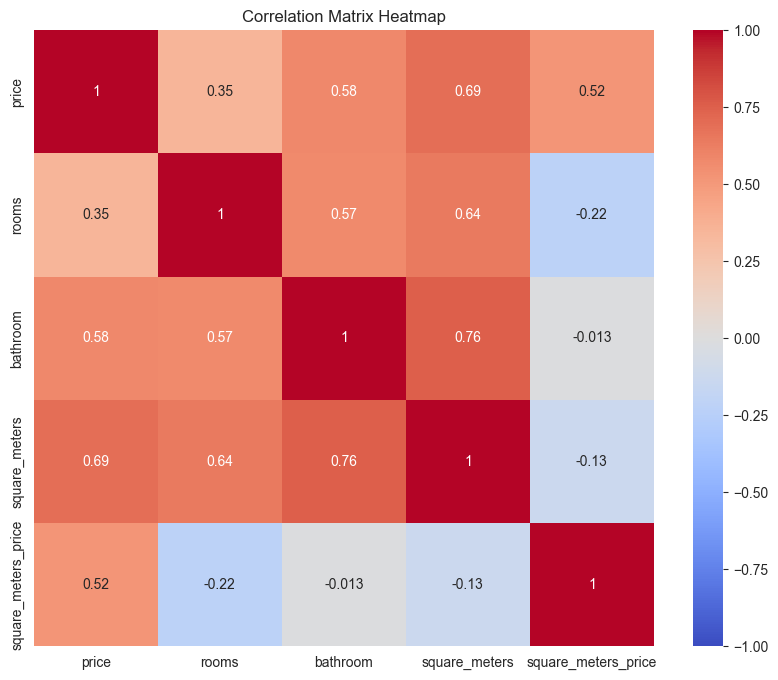

In [183]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [184]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', key=abs, ascending=False) # Sort the DataFrame by the absolute value of correlation
#sorted_corr # Display the sorted correlation table

In [185]:
# Define a function to categorize the correlation level
def categorize_correlation(correlation):
    abs_corr = abs(correlation) * 100  # Convert to percentage for easier comparison
    if abs_corr < 30:
        return 'Negligible'
    elif 30 <= abs_corr < 50:
        return 'Low'
    elif 50 <= abs_corr < 70:
        return 'Moderate'
    elif 70 <= abs_corr < 90:
        return 'High'
    else:
        return 'Very High'


In [238]:
# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)
sorted_corr['corr_lvl'].value_counts()


corr_lvl
Moderate      5
Negligible    3
High          1
Low           1
Name: count, dtype: int64

In [239]:
sorted_corr

,variable1,variable2,correlation,corr_lvl
13,bathroom,square_meters,0.755291,High
3,price,square_meters,0.690398,Moderate
8,rooms,square_meters,0.644285,Moderate
2,price,bathroom,0.579747,Moderate
7,rooms,bathroom,0.572576,Moderate
4,price,square_meters_price,0.520627,Moderate
1,price,rooms,0.348086,Low
9,rooms,square_meters_price,-0.223946,Negligible
19,square_meters,square_meters_price,-0.128385,Negligible
14,bathroom,square_meters_price,-0.013050,Negligible


In [188]:
data.columns

Index(['price', 'rooms', 'bathroom', 'lift', 'terrace', 'square_meters',
       'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

In [231]:
# check unique rooms-bathroom combinations
unique_combinations=data.groupby(['rooms', 'bathroom']).size().reset_index(name='count')
unique_combinations_sorted=unique_combinations.sort_values(by='count',ascending=False)

In [232]:
# Calculate cumulative sum of counts
unique_combinations_sorted['cum_sum'] = unique_combinations_sorted['count'].cumsum()

In [236]:
# Calculate the cumulative percentage
unique_combinations_sorted['perc'] = unique_combinations_sorted['count'] / unique_combinations_sorted['count'].sum() * 100
unique_combinations_sorted['cum_perc'] = unique_combinations_sorted['cum_sum'] / unique_combinations_sorted['count'].sum() * 100
unique_combinations_sorted.head(6)

,rooms,bathroom,count,cum_sum,perc,cum_perc
6,2,1,1836,1836,22.423058,22.423058
4,1,1,1519,3355,18.551539,40.974597
11,3,2,1207,4562,14.741085,55.715681
10,3,1,1123,5685,13.715193,69.430874
7,2,2,735,6420,8.976551,78.407426
17,4,2,641,7061,7.828530,86.235955


In [260]:
filtered_data = data.merge(unique_combinations_sorted.head(6), on=['rooms', 'bathroom'])
filtered_data

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price,count,cum_sum,perc,cum_perc
0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000,1123,5685,13.715193,69.430874
1,770,2,1,True,False,59,flat,Sant Andreu,13.050847,1836,1836,22.423058,22.423058
2,1300,1,1,True,True,30,flat,Gràcia,43.333333,1519,3355,18.551539,40.974597
3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000,1519,3355,18.551539,40.974597
4,720,2,1,True,False,44,flat,Sant Andreu,16.363636,1836,1836,22.423058,22.423058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,1075,2,2,False,False,65,flat,Gràcia,16.538462,735,6420,8.976551,78.407426
7057,1500,3,2,True,False,110,flat,Eixample,13.636364,1207,4562,14.741085,55.715681
7058,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667,735,6420,8.976551,78.407426
7059,1500,3,2,True,False,110,flat,Eixample,13.636364,1207,4562,14.741085,55.715681


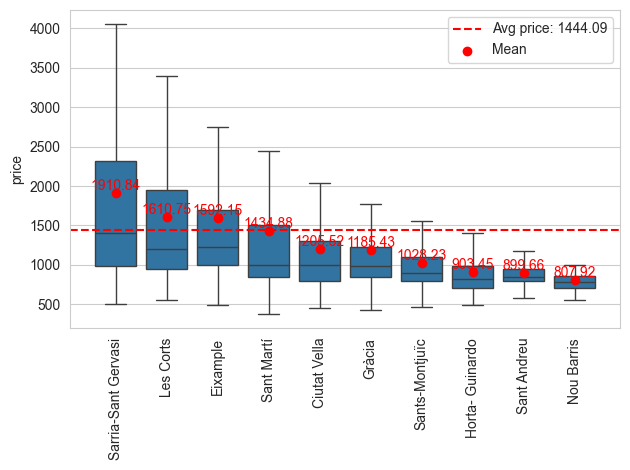

In [244]:
boxplot_by_group(data, 'neighborhood' , 'price', 0)

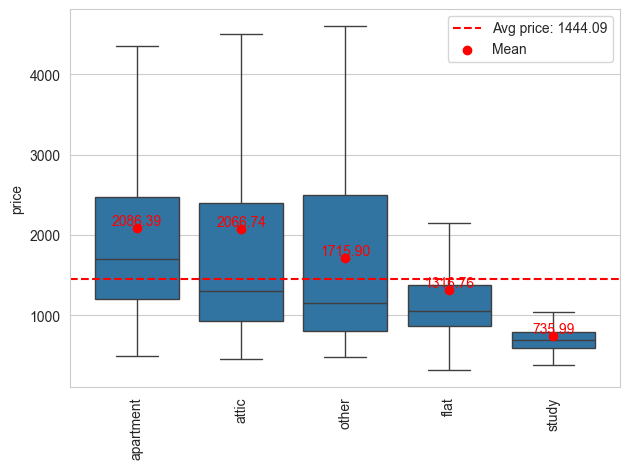

In [245]:
boxplot_by_group(data, 'real_state' , 'price', 0)

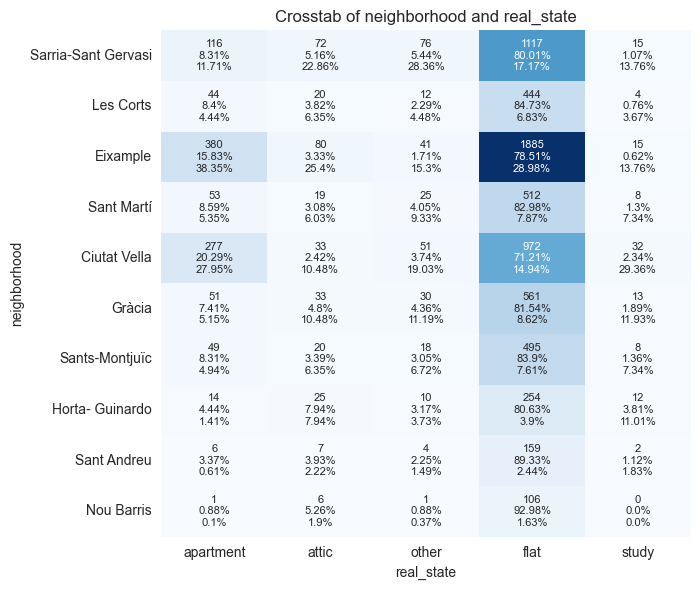

In [250]:
plot_crosstab_heat_perc(data, var_interest='real_state')

In [254]:
print(pd.Series(data['neighborhood'].unique()).str.cat(sep=", "))

Horta- Guinardo, Sant Andreu, Gràcia, Ciutat Vella, Sarria-Sant Gervasi, Les Corts, Sant Martí, Eixample, Sants-Montjuïc, Nou Barris


In [262]:
data.columns

Index(['price', 'rooms', 'bathroom', 'lift', 'terrace', 'square_meters',
       'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

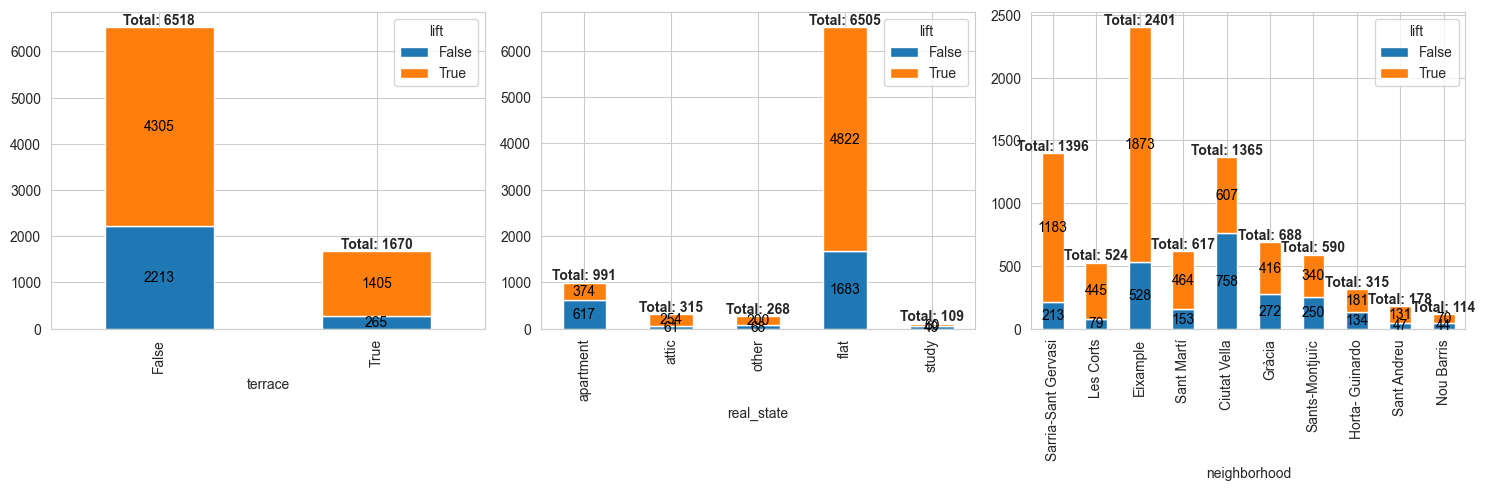

In [267]:
plot_crosstab_bar_count(data, var_interest='lift')

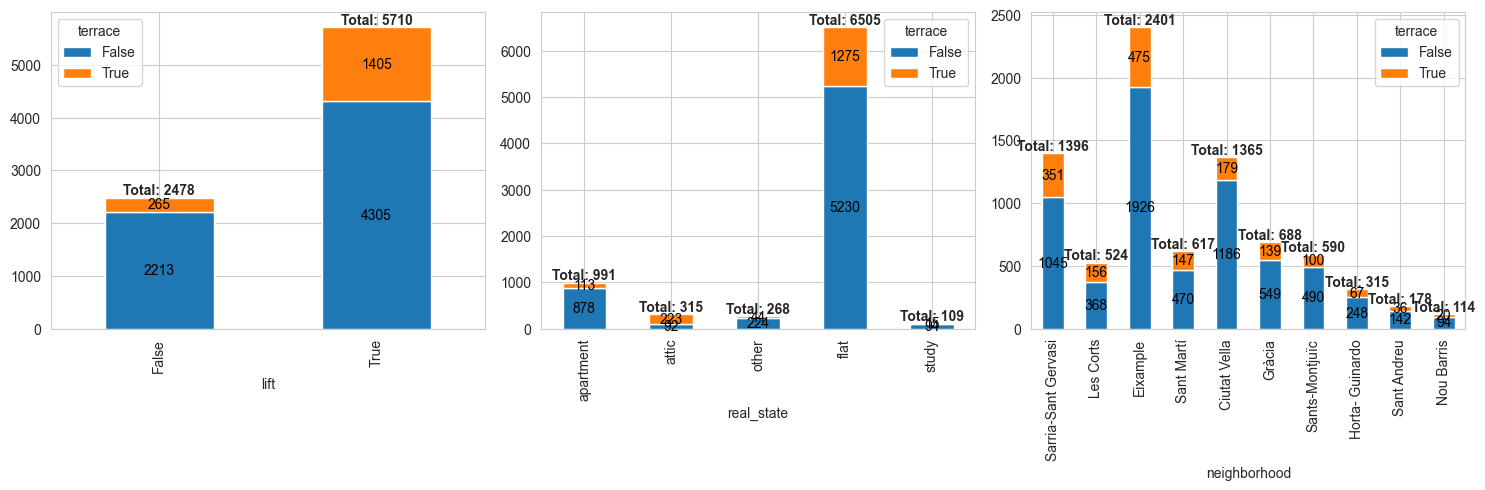

In [268]:
plot_crosstab_bar_count(data, var_interest='terrace')

# Consolidated notes on Exploratory Data Analysis

# Consolidated notes on Exploratory Data Analysis

**Functions:**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category

**Missing value treatment:**
- created category "other" in 'real_state' variable replacing NaN

**Feature engineering:**
- Droped variable "Unnamed: 0" having no value for modeling
- There are units with cero rooms, considered real data.

**Outlier detection and treatment**
- There are outliers in all variables. Considered natural and not to be caped.

**Univariate Analysis**
- numerical variables have a right sqewed
- categorical variables are unbalanced, with 79% of real_state as "flat" and 78% of units concentrated on 50% of sample's neighbourhoods

**Bivariate Analysis**
- There is only one pair of variables with high correlation: bathroom-square_meters	(0.75)
- This correlation it does make sense and will be considered during modeling.
- The most popular unit configuration in dataset have 2 rooms and 1 bathroom with 1836 units (21% of all units).
- Other popular configurations are 1-1(18%), 3-2(14%), 3-1(13%), 2-2(9%) and 4-2(8%)
- Those six most popular unit configurations counts for 86% of all units
- Sarria-Sant Gervasi, Les Corts, and Eixample are the more expensive neighbourhoods with mean prices above dataset mean.
- Horta- Guinardo, Sant Andreu, Nou Barris are the cheapest neighbourhoods with mean prices bellow dataset mean.
- apartment and atic are the most expensive unit types together with "other" (being "other" the unit type created to replace NaN in original dataset)
- flat and study are the cheapest unit types with mean prices bellow dataset mean
- flats at Eixample is the most popular type of unit and neighbourhood combination, with 78.51% of units at Eixample being flats, and 28.98% of flats are at Eixample.
- most unit types in do have lift, in flats units the proportion is 74,12%
- terrace in the other hand seems to be rare and very few units across all neighbourhoods do have terrace